<a href="https://colab.research.google.com/github/ilovec8763/Atrial-Fibrillation-AFib-binary-classifier/blob/main/drought_on_the_ground_s3_data_download_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
-content(原本colab 已經存在的根目錄)
  |
  |
  |-dataset
  |  |--split_train
  |  |
  |  |--split_validation
  |-Test.csv
  |-Train.csv
"""

'\n-content(原本colab 已經存在的根目錄)\n  |\n  |\n  |-dataset\n  |  |--split_train\n  |  |\n  |  |--split_validation\n  |-Test.csv\n  |-Train.csv\n'

In [1]:
from google.colab import drive
drive.mount('/gdrive')


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
%cd /gdrive/My Drive/

/gdrive/My Drive


In [2]:
import os

# 獲取當前工作目錄
current_directory = os.getcwd()

# 列出當前目錄中的檔案和資料夾
contents = os.listdir(current_directory)

# 顯示列表中的檔案和資料夾
for item in contents:
    print(item)



.config
dataset
.ipynb_checkpoints
catboost_info
Test.csv
Train.csv
sample_data


In [ ]:
# 創建新文件夾
#%mkdir Zindi_photos
# 並列出當前目錄下的文件夾
%ls -d */
print("************")
# 列出新建目錄下的文件夾
%ls -d Zindi_photos/*/

 blogger//                     'ml paper/'/      照片//
 catboost_info//                N5//            '照片 (1)/'/
'Colab Notebooks/'/             Zindi_photos//   陳老師祝福影片//
 ECG-HRV//                      單純覺得有趣//
'First step for everything/'/   影印//
************
Zindi_photos/train//


In [4]:

import os
os.getcwd()

'/content'

In [ ]:
# 刪除特定目錄下、特定副檔名的檔案，不會遞迴地刪除子目錄下的檔案

def delete_files_with_extension(folder_path, target_extension):
    try:
        # 檢查資料夾是否存在
        if not os.path.exists(folder_path):
            print(f"資料夾 '{folder_path}' 不存在。")
            return

        # 遍歷資料夾中的所有檔案
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)

            # 檢查是否為指定副檔名的檔案
            if filename.endswith(target_extension):
                # 刪除檔案
                os.remove(file_path)
                print(f"已刪除檔案: {file_path}")

        print("刪除完成。")

    except Exception as e:
        print(f"刪除檔案時出現錯誤: {str(e)}")

# 要刪除的副檔名和目標資料夾的路徑
folder_path = 'your_folder_path'  # 請替換成目標資料夾的實際路徑
target_extension = '.txt'  # 請替換成要刪除的副檔名，例如 '.txt'、'.jpg' 等

"""
# 呼叫函數以刪除檔案
delete_files_with_extension(folder_path, target_extension)
"""

'\n# 呼叫函數以刪除檔案\ndelete_files_with_extension(folder_path, target_extension)\n'

In [ ]:
"""
這裡刪掉不小心存到My Drive根目錄的jpg檔
"""
#target_extension = 'JPG'
#delete_files_with_extension('/gdrive/My Drive',target_extension )

'\n這裡刪掉不小心存到My Drive根目錄的jpg檔\n'

In [ ]:
# 這個用一次之後，若沒有要重新上傳就不要動
"""
import zipfile
import os

# 要解壓縮的ZIP文件的路徑
zip_file_path = 'Zindi_photos/train.zip' # 這是我雲端硬碟的路徑

# 要存儲解壓縮內容的目標資料夾
target_folder = 'Zindi_photos/train'

# 創建目標資料夾（如果不存在）
if not os.path.exists(target_folder):
    os.makedirs(target_folder)

# 使用 zipfile 模組打開 ZIP 文件
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # 解壓縮 ZIP 文件中的所有內容到目標資料夾
    zip_ref.extractall(target_folder)

print(f'已解壓縮至目標資料夾: {target_folder}')
"""

"\nimport zipfile\nimport os\n\n# 要解壓縮的ZIP文件的路徑\nzip_file_path = 'Zindi_photos/train.zip' # 這是我雲端硬碟的路徑\n\n# 要存儲解壓縮內容的目標資料夾\ntarget_folder = 'Zindi_photos/train'\n\n# 創建目標資料夾（如果不存在）\nif not os.path.exists(target_folder):\n    os.makedirs(target_folder)\n\n# 使用 zipfile 模組打開 ZIP 文件\nwith zipfile.ZipFile(zip_file_path, 'r') as zip_ref:\n    # 解壓縮 ZIP 文件中的所有內容到目標資料夾\n    zip_ref.extractall(target_folder)\n\nprint(f'已解壓縮至目標資料夾: {target_folder}')\n"

In [5]:
import pandas as pd

In [6]:
# 我先將檔案存到colab的根目錄，再讀取成dataframe
train_df = pd.read_csv('/content/Train.csv')
display(train_df)



,ID,filename,growth_stage,damage,extent,season
0,ID_1S8OOWQYCB,L427F01330C01S03961Rp02052.jpg,S,WD,0,SR2020
1,ID_0MD959MIZ0,L1083F00930C39S12674Ip.jpg,V,G,0,SR2021
2,ID_JRJCI4Q11V,24_initial_1_1463_1463.JPG,V,G,0,LR2020
3,ID_DBO3ZGI1GM,L341F00167C01S00324Rp14178.jpg,M,DR,60,SR2020
4,ID_ORZLWTEUUS,L1084F02394C39S13931Ip.jpg,V,G,0,SR2021
...,...,...,...,...,...,...
26063,ID_3II1SXC0ZO,L1084F03259C39S12149Rp41671.jpg,M,DR,30,SR2021
26064,ID_OE7OU9ZF4U,L406F04369C01S07190Rp22847.jpg,V,G,0,LR2021
26065,ID_20M531UIZZ,L134F00766C01S09784Rp26034.jpg,M,G,0,LR2021
26066,ID_BZBV2FH0KL,L1153F02464C01S00194Rp01561.jpg,F,G,0,SR2020


In [7]:
"""
用於split_data函數
"""
import random
from shutil import copyfile
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
    """
    Splits the data into train and test sets

    Args:
    SOURCE_DIR (string): directory path containing the images
    TRAINING_DIR (string): directory path to be used for training
    VALIDATION_DIR (string): directory path to be used for validation
    SPLIT_SIZE (float): proportion of the dataset to be used for training

    Returns:
    None
    """
    listdir_image_source = os.listdir(SOURCE_DIR)

    for dir in listdir_image_source:
        if os.path.getsize(os.path.join(SOURCE_DIR,dir)) == 0:
            listdir_image_source.remove(dir)
            filename = dir
            print(f'{filename} is zero length, so ignoring.')

    number_of_available_images = len(listdir_image_source)
    file_to_training_dir = random.sample( listdir_image_source, int(len(listdir_image_source) * SPLIT_SIZE) )
    file_to_validation_dir = list( set(listdir_image_source).difference(set(file_to_training_dir)) )
    for dir in file_to_training_dir:
        source = os.path.join(SOURCE_DIR, dir)
        destination = TRAINING_DIR
        copyfile(source, os.path.join(destination, dir))

    for dir in file_to_validation_dir:
        source = os.path.join(SOURCE_DIR, dir)
        destination = VALIDATION_DIR
        copyfile(source, os.path.join(destination, dir))

In [8]:
SOURCE_DIR = 'Zindi_photos/train' # 描述google drive 目錄時，你不需要在Zindi_photos前面加上"/"符號，不然會認不出來。
TRAINING_DIR = '/content/dataset/split_train' # 但是colab上面卻可以在最前面加上"/"符號，這是一個不同之處。
VALIDATION_DIR = '/content/dataset/split_validation'
SPLIT_SIZE = 0.8


In [ ]:
"""
勿刪!!!!
"""
# 你不要在laptop上一直用這個函數，否則會重複load檔案!!!
split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE)

In [9]:
test_df = pd.read_csv('/content/Test.csv') # 沒有labels
display(test_df)

,ID,filename,growth_stage,damage,season
0,ID_ROOWKB90UZ,L122F00315C01S02151Rp04021.jpg,V,WD,SR2020
1,ID_PTEDRY0CYM,L1089F03254C01S08845Rp25119.jpg,F,WD,LR2021
2,ID_5WJXDV96R4,L365F01913C39S12578Rp42918.jpg,V,WD,SR2021
3,ID_DM4AQLXXYG,223_repeat_2_2230_3599_2343.JPG,F,G,LR2020
4,ID_V6YTIT7I2S,L354F00276C01S08045Rp23693.jpg,F,G,LR2021
...,...,...,...,...,...
8658,ID_VYEB1ABJYA,L1122F01093C01S10236Rp20455.jpg,V,WD,LR2021
8659,ID_HQT6T7QYA4,L322F03389C39S14157Rp40614.jpg,V,WD,SR2021
8660,ID_FKC93FVGL1,L134F00855C01S05273Rp06412.jpg,V,WD,SR2020
8661,ID_EEJLBVEFGI,L410F02877C01S02293Rp01971.jpg,V,WD,SR2020


In [10]:
# 你這裡要重新生成一個特別給split_train和split_test的 list_file
# 而且標籤的順序還要跟list裡面的順序一樣
list_split_train = os.listdir(TRAINING_DIR)
list_split_validation = os.listdir(VALIDATION_DIR)

In [11]:
list_split_train[:10]

['L121F01775C42S13161Rp48926.jpg',
 'L125F03406C01S13955Rp47279.jpg',
 'L342F02139C01S04766Rp11511.jpg',
 'L406F01517C01S14394Rp47371.jpg',
 'L133F00737C01S03192Rp05796.jpg',
 'L231F00513C03S08763Rp30308.jpg',
 'L354F01030C01S02832Rp01652.jpg',
 'L415F01039C39S12723Rp39327.jpg',
 'L1094F00681C01S00711Rp01768.jpg',
 'L361F03428C39S13044Ip.jpg']

In [12]:
# 資料順序跟train_df相同，只是不在list_split_train中的會排除掉。
split_train_df = train_df[train_df['filename'].isin(list_split_train)]
# 只留下['filename', 'extent'] 做成訓練集
train_data = split_train_df[['filename', 'extent']]
train_data.shape
train_data.head(10)

,filename,extent
0,L427F01330C01S03961Rp02052.jpg,0
1,L1083F00930C39S12674Ip.jpg,0
2,24_initial_1_1463_1463.JPG,0
3,L341F00167C01S00324Rp14178.jpg,60
4,L1084F02394C39S13931Ip.jpg,0
5,L361F02347C01S10018Rp27925.jpg,0
6,L1122F02114C01S09921Rp29452.jpg,0
7,L321F03728C01S07028Rp24013.jpg,0
9,L133F00737C01S06945Rp25674.jpg,60
11,L141F00095C01S07755Rp23002.jpg,0


In [43]:
display(split_train_df["extent"].value_counts())
protion_of_zeros_in_data = split_train_df["extent"].value_counts()[0]/split_train_df["extent"].value_counts().sum()
print("About ",protion_of_zeros_in_data * 100, "% of pictures with extent 0.")

0      17243
10       589
30       576
40       553
20       542
50       356
60       319
90       251
80       230
70       156
100       39
Name: extent, dtype: int64

About  82.68437709791885 % of pictures with extent 0.


In [13]:
# 資料順序跟train_df相同，只是不在list_split_validation中的會排除掉。
split_valid_df = train_df[train_df['filename'].isin(list_split_validation)]
# 只留下['filename', 'extent'] 做成訓練集
valid_data = split_valid_df[['filename', 'extent']]
valid_data.shape
valid_data.head(10)

,filename,extent
8,L331F04678C01S11060Rp30683.jpg,40
10,L231F02301C41S13792Rp36019.jpg,0
18,L325F01429C01S07301Rp19436.jpg,0
30,L406F00362C01S14389Rp40939.jpg,0
31,L121F00577C01S04002Rp08500.jpg,0
37,L1093F03320C01S06792Rp29181.jpg,0
38,L134F00875C01S01078Rp01371.jpg,0
41,L134F00762C01S05370Rp14099.jpg,70
45,L134F04228C01S09707Rp19925.jpg,0
46,L1144F04460C39S12064Rp34619.jpg,0


In [14]:
INPUT_SHAPE = (250, 250, 3)
TARGET_SIZE = (250, 250)

In [47]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# data 是一個包含 'filename'和 'extent'的dataframe，x_col 設為'filename', y_col設為'extent'
train_generator = train_datagen.flow_from_dataframe(dataframe=train_data, directory=TRAINING_DIR,
                                              x_col="filename", y_col="extent", has_ext=True,
                                              class_mode="other", target_size=TARGET_SIZE,
                                              batch_size=128, shuffle=False
                                                    )

# valid_data 是一個包含 'filename'和 'extent'的dataframe，x_col 設為'filename', y_col設為'extent'
validation_generator = validation_datagen.flow_from_dataframe(dataframe=valid_data, directory=VALIDATION_DIR,
                                              x_col="filename", y_col="extent", has_ext=True,
                                              class_mode="other", target_size=TARGET_SIZE,
                                              batch_size=128, shuffle=False)


"""
資料格式train_generator 和 validation_generator的資料格式 :
(一個批次的圖像陣列, 一個批次的標籤)
假如#chennels = 3
形狀 : ((batch_size, width, height, #chennels), (batch_size,))
"""

Found 20854 validated image filenames.
Found 5214 validated image filenames.


'\n資料格式train_generator 和 validation_generator的資料格式 :\n(一個批次的圖像陣列, 一個批次的標籤)\n假如#chennels = 3\n形狀 : ((batch_size, width, height, #chennels), (batch_size,))\n'

In [26]:

# Download the pre-trained weights. No top means it excludes the fully connected layer it uses for classification.
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5


--2023-09-09 13:59:52--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.207, 172.253.114.207, 172.217.214.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   224MB/s    in 0.4s    

2023-09-09 13:59:52 (224 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [48]:
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers

# Set the weights file you downloaded into a variable
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Initialize the base model.
# Set the input shape and remove the dense layers.
pre_trained_model = InceptionV3(input_shape = INPUT_SHAPE,
                                include_top = False,
                                weights = None)

# Load the pre-trained weights you downloaded.
pre_trained_model.load_weights(local_weights_file)

# Freeze the weights of the layers.
for layer in pre_trained_model.layers:
  layer.trainable = False

In [49]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 250, 250, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 124, 124, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 124, 124, 32)         96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 124, 124, 32)         0         ['batch_normalizati

# 我覺得5千多維的特徵已經非常大了，可能要做data balancing才能再改進mse的大小!

In [86]:
# Choose `mixed8` as the last layer of your base model
feature_extraction_layer = pre_trained_model.get_layer('mixed5') # 把InceptionV3的其中一層拿來當作特徵層
maxpooling_feature= tf.keras.layers.MaxPooling2D(pool_size=(5, 5))(feature_extraction_layer.output)
flatten_features = tf.keras.layers.Flatten()(maxpooling_feature)
print('flatten_features layer shape: ', flatten_features.shape)
#print('last feature extraction layer shape: ', flatten_features.output_shape)

flatten_features layer shape:  (None, 3072)


In [87]:
from keras.applications import InceptionV3
from keras.models import Model

feature_extraction_model = Model(inputs=pre_trained_model.input, outputs=flatten_features)

In [88]:
import numpy as np

In [89]:
train_features = feature_extraction_model.predict(train_generator)

163/163 [==============================] - 303s 2s/step


In [90]:
train_features.shape
#train_features = train_features.reshape((20854, 1280))

(20854, 3072)

In [91]:
valid_features = feature_extraction_model.predict(validation_generator) #5214

41/41 [==============================] - 75s 2s/step


In [92]:
# valid_features = valid_features.reshape((5214, 1280))

In [93]:
valid_features.shape

(5214, 3072)

In [94]:
validation_generator.labels

array([40,  0,  0, ...,  0,  0,  0])

In [95]:
train_features.shape

(20854, 3072)

In [96]:
train_generator.labels.shape

(20854,)

In [97]:
"""
勿刪!!!
"""
#np.column_stack([predict,train_generator.labels]).shape

'\n勿刪!!!\n'

In [98]:
!pip install catboost

In [101]:
from catboost import CatBoostRegressor
catboost_model = CatBoostRegressor(learning_rate=0.05, depth=6, n_estimators=1000, task_type="GPU")
catboost_model.fit(train_features, train_generator.labels, eval_set=(valid_features, validation_generator.labels), verbose=1, plot=True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 18.5400552	test: 17.9738641	best: 17.9738641 (0)	total: 396ms	remaining: 6m 36s
1:	learn: 18.3707124	test: 17.8229187	best: 17.8229187 (1)	total: 658ms	remaining: 5m 28s
2:	learn: 18.2188906	test: 17.6869806	best: 17.6869806 (2)	total: 923ms	remaining: 5m 6s
3:	learn: 18.0681386	test: 17.5496235	best: 17.5496235 (3)	total: 1.18s	remaining: 4m 54s
4:	learn: 17.9263616	test: 17.4121776	best: 17.4121776 (4)	total: 1.46s	remaining: 4m 49s
5:	learn: 17.7859935	test: 17.2935241	best: 17.2935241 (5)	total: 1.71s	remaining: 4m 43s
6:	learn: 17.6593357	test: 17.1817848	best: 17.1817848 (6)	total: 1.99s	remaining: 4m 42s
7:	learn: 17.5489212	test: 17.0957059	best: 17.0957059 (7)	total: 2.25s	remaining: 4m 39s
8:	learn: 17.4340707	test: 16.9880617	best: 16.9880617 (8)	total: 2.52s	remaining: 4m 38s
9:	learn: 17.3233774	test: 16.8857215	best: 16.8857215 (9)	total: 2.82s	remaining: 4m 39s
10:	learn: 17.2380448	test: 16.8062828	best: 16.8062828 (10)	total: 3.14s	remaining: 4m 42s
11:	learn

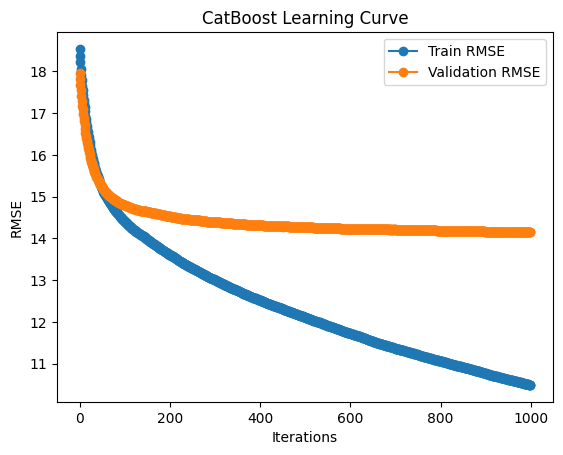

In [102]:
import matplotlib.pyplot as plt
# 獲取訓練過程記錄
train_metrics = catboost_model.evals_result_['learn']
valid_metrics = catboost_model.evals_result_['validation']

# 提取 RMSE（或其他損失指標）的數值
train_rmse = train_metrics['RMSE']
valid_rmse = valid_metrics['RMSE']

# 獲取訓練迭代數
iterations = range(len(train_rmse))

# 繪製學習曲線
plt.plot(iterations, train_rmse, label='Train RMSE', marker='o')
plt.plot(iterations, valid_rmse, label='Validation RMSE', marker='o')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.legend()
plt.title('CatBoost Learning Curve')
plt.savefig('learning_curve.png')  # 保存學習曲線圖為圖片文件
plt.show()  # 顯示圖片（可選）
